<a href="https://colab.research.google.com/github/yuriborg/models/blob/main/little_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the creator

My name is Yuri Borges, I'm a Physics Bachelor student at USP (University of São Paulo) and I work with Data Science/Data Analysis for almost 3.5 years from now.

I created these tutorials a year and a half ago to help me revisit my knowledge, and I will soon be formatting properly to turn this into a complete tutorial for beginners. I hope you enjoy it, and good studying!

Follow me on linkedin: https://www.linkedin.com/in/yuri-borges-b7b76b169/
Follow me on github: https://github.com/yuriborg



# Tasks

- Rank US states and territories by their 2010 population density.

# Libraries

In [ ]:
import pandas as pd
import numpy as np

# Density US States Data

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0  2357k      0 --:--:-- --:--:-- --:--:-- 2357k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0  43947      0 --:--:-- --:--:-- --:--:-- 43947
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0  43600      0 --:--:-- --:--:-- --:--:-- 43600


In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [ ]:
print(pop.head(),'\n', areas.head(),'\n', abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0 
         state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707 
         state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [ ]:
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

<ipython-input-61-ffe4f2894b5d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  merged = merged.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [ ]:
merged.isnull().any()  #Check null values

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [ ]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [ ]:
merged[merged['state'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [ ]:
#PR has many null values

In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [ ]:
#Looking mismatches

final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [ ]:
final.loc[final['population'].isnull()].head()

,state/region,ages,year,population,state,area (sq. mi)
2448,PR,under18,1990,NaN,Puerto Rico,3515.0
2449,PR,total,1990,NaN,Puerto Rico,3515.0
2450,PR,total,1991,NaN,Puerto Rico,3515.0
2451,PR,under18,1991,NaN,Puerto Rico,3515.0
2452,PR,total,1993,NaN,Puerto Rico,3515.0


In [ ]:
final = final.rename(columns={'area (sq. mi)': 'area'})
final

,state/region,ages,year,population,state,area
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [ ]:
final.loc[final['area'].isnull()].any()

state/region     True
ages             True
year             True
population       True
state            True
area            False
dtype: bool

In [ ]:
final.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
area             True
dtype: bool

In [ ]:
final['state'][final['area'].isnull()].unique()

array(['United States'], dtype=object)

In [ ]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [ ]:
data2010.columns

Index(['state/region', 'ages', 'year', 'population', 'state', 'area'], dtype='object')

In [ ]:
data2010.set_index('state/region', inplace=True)
density = data2010['population'] / data2010['area']
density

state/region
AL      91.287603
AK       1.087509
AZ      56.214497
AR      54.948667
CA     228.051342
CO      48.493718
CT     645.600649
DE     460.445752
DC    8898.897059
FL     286.597129
GA     163.409902
HI     124.746707
ID      18.794338
IL     221.687472
IN     178.197831
IA      54.202751
KS      34.745266
KY     107.586994
LA      87.676099
ME      37.509990
MD     466.445797
MA     621.815538
MI     102.015794
MN      61.078373
MS      61.321530
MO      86.015622
MT       6.736171
NE      23.654153
NV      24.448796
NH     140.799273
NJ    1009.253268
NM      16.982737
NY     356.094135
NC     177.617157
ND       9.537565
OH     257.549634
OK      53.778278
OR      39.001565
PA     275.966651
RI     681.339159
SC     144.854594
SD      10.583512
TN     150.825298
TX      93.987655
UT      32.677188
VT      65.085075
VA     187.622273
WA      94.557817
WV      76.519582
WI      86.851900
WY       5.768079
PR    1058.665149
dtype: float64

In [ ]:
density.tail()

state/region
WA      94.557817
WV      76.519582
WI      86.851900
WY       5.768079
PR    1058.665149
dtype: float64

In [ ]:
# #An essential piece of analysis of large data is efficient summarization: computing
# aggregations like sum(), mean(), median(), min(), and max(), in which a single num‐
# ber gives insight into the nature of a potentially large dataset.

#Planets Data

- count discovered planets by method and by decade:

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Births Data

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0  10.0M      0 --:--:-- --:--:-- --:--:-- 10.0M


In [ ]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births['decade'] = 10 * (births['year'] // 10)
births['decade'] = births['decade'].astype('str') + 's'
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


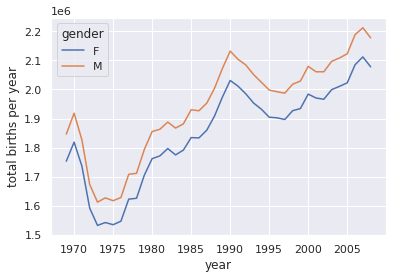

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980s
15063,1988,12,30.0,F,5742,1980s
15064,1988,12,30.0,M,6095,1980s
15065,1988,12,31.0,F,4435,1980s


In [ ]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)
births['day']

0         1
1         1
2         2
3         2
4         3
         ..
15062    29
15063    30
15064    30
15065    31
15066    31
Name: day, Length: 14610, dtype: int64

In [ ]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

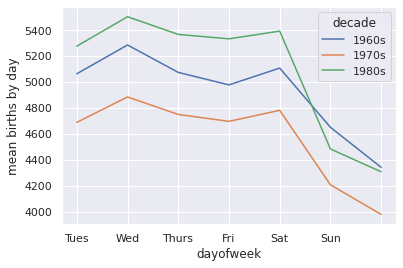

In [ ]:
#Using this we can plot births by weekday for several decades

births.pivot_table('births', index='dayofweek',
                            columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [ ]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960s,2
1969-01-01,1969,1,1,M,4440,1960s,2
1969-01-02,1969,1,2,F,4454,1960s,3
1969-01-02,1969,1,2,M,4548,1960s,3
1969-01-03,1969,1,3,F,4548,1960s,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980s,3
1988-12-30,1988,12,30,F,5742,1980s,4
1988-12-30,1988,12,30,M,6095,1980s,4
1988-12-31,1988,12,31,F,4435,1980s,5


In [ ]:
# the mean number of births by the day of the year.
# Let’s first group the data by month and day separately:

births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [ ]:
#More interpretable version
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

<ipython-input-106-c31d8a4b0cb4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


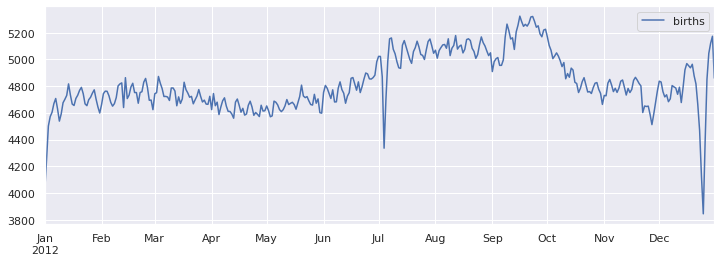

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# Reading JSON Data

In [ ]:
# try:
#   recipes = pd.read_json('recipeitems-latest.json')
# except ValueError as e:
#   print("ValueError:", e)

In [ ]:
# with open('recipeitems-latest.json') as f:
#   line = f.readline()
#   pd.read_json(line).shape

In [ ]:
# # read the entire file into a Python array
# with open('recipeitems-latest.json', 'r') as f:
#   # Extract each line
#   data = (line.strip() for line in f)
#   # Reformat so each line is the element of a list
#   data_json = "[{0}]".format(','.join(data))
#   # read the result as a JSON
#   recipes = pd.read_json(data_json)

# Seattle Bycicle

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2725k    0 2725k    0     0  1400k      0 --:--:--  0:00:01 --:--:-- 1399k


In [ ]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
